# Step-0: Imports and Reading Daata

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
## To show all the rows and columns, we use followings, which is self explanatory
# pd.set_option('display.max_columns', 200)
# pd.set_option('display.max_rows', 100)
# pd.set_option('display.min_rows', 100)
# pd.set_option('display.expand_frame_repr', True)

# Step-1: Data Understanding

In [2]:
%pwd

'/Users/arunp77/Documents/Data-science/Statistics/notebooks'

In [3]:
df = pd.read_csv('coaster_db.csv')

# Step 1: Data Understanding

- Dataframe shape
- head and tail
- dtype
- describe

In [4]:
df.shape

(1087, 56)

In [5]:
df.head(5)

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [6]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [7]:
df.dtypes

coaster_name                      object
Length                            object
Speed                             object
Location                          object
Status                            object
Opening date                      object
Type                              object
Manufacturer                      object
Height restriction                object
Model                             object
Height                            object
Inversions                       float64
Lift/launch system                object
Cost                              object
Trains                            object
Park section                      object
Duration                          object
Capacity                          object
G-force                           object
Designer                          object
Max vertical angle                object
Drop                              object
Soft opening date                 object
Fast Lane available               object
Replaced        

In [8]:
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


# Step 3: Data Preparation

- Dropping irrelaevant columns and rows
- Identify duplicated columns
- renaming Columns
- Feature creation

In [9]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

Subset of the columns

In [10]:
df[['coaster_name', 
    #   'Length', 'Speed', 
        'Location', 'Status', 
    #   'Opening date',
    #    'Type', 
       'Manufacturer', 
    #  'Height restriction', 'Model', 'Height',
    #  'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
    #  'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
    #   'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
    #   'Track layout', 'Fastrack available', 'Soft opening date.1',
    #   'Closing date', 
    #    'Opened', 
    #    'Replaced by', 'Website',
    #   'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
    #   'Single rider line available', 'Restraint Style',
    #   'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
        'year_introduced', 'latitude', 'longitude', 'Type_Main',
        'opening_date_clean', 
    #   'speed1', 'speed2', 'speed1_value', 'speed1_unit',
        'speed_mph', 
    #   'height_value', 'height_unit', 
        'height_ft',
       'Inversions_clean', 'Gforce_clean'
    ]].head(5)

,coaster_name,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


To drop just few columns from few columns

In [11]:
df.drop([#'coaster_name', 
       'Length', 'Speed', 
    #    'Location', 'Status', 
       'Opening date',
        'Type', 
    #   'Manufacturer', 
      'Height restriction', 'Model', 'Height',
      'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
      'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 
    #    'Opened', 
        'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
    #    'year_introduced', 'latitude', 'longitude', 'Type_Main',
    #   'opening_date_clean', 
       'speed1', 'speed2', 'speed1_value', 'speed1_unit',
    #    'speed_mph', 
       'height_value', 'height_unit', 
    #    'height_ft',
    #  'Inversions_clean', 'Gforce_clean'
     ], axis=1).head(3)

,coaster_name,Location,Status,Manufacturer,Opened,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,NaN,1884,40.574,-73.978,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,NaN,1895,40.578,-73.979,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1895,1896,41.580,-81.570,Other,NaN,NaN,NaN,0,NaN


In present discussion, I am going to first option to droping selcted columns

In [12]:
dfcopy = df[['coaster_name', 
    #   'Length', 'Speed', 
        'Location', 'Status', 
    #   'Opening date',
    #    'Type', 
       'Manufacturer', 
    #  'Height restriction', 'Model', 'Height',
    #  'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
    #  'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
    #   'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
    #   'Track layout', 'Fastrack available', 'Soft opening date.1',
    #   'Closing date', 
    #    'Opened', 
    #    'Replaced by', 'Website',
    #   'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
    #   'Single rider line available', 'Restraint Style',
    #   'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
        'year_introduced', 'latitude', 'longitude', 'Type_Main',
        'opening_date_clean', 
    #   'speed1', 'speed2', 'speed1_value', 'speed1_unit',
        'speed_mph', 
    #   'height_value', 'height_unit', 
        'height_ft',
       'Inversions_clean', 'Gforce_clean'
    ]].copy()

In [13]:
dfcopy.shape

(1087, 13)

In [14]:
dfcopy.dtypes

coaster_name           object
Location               object
Status                 object
Manufacturer           object
year_introduced         int64
latitude              float64
longitude             float64
Type_Main              object
opening_date_clean     object
speed_mph             float64
height_ft             float64
Inversions_clean        int64
Gforce_clean          float64
dtype: object

We see that the 'Opening _date_clean' dtype as object. But we want it to be date-time column. SO to convert dtype from Object to datetime, we use

In [15]:
pd.to_datetime(dfcopy['opening_date_clean']);

Now we rewrite the 'opening_date_clean' column to datetime dtype, we use

In [16]:
dfcopy['opening_date_clean']= pd.to_datetime(dfcopy['opening_date_clean'])

In [17]:
dfcopy.dtypes

coaster_name                  object
Location                      object
Status                        object
Manufacturer                  object
year_introduced                int64
latitude                     float64
longitude                    float64
Type_Main                     object
opening_date_clean    datetime64[ns]
speed_mph                    float64
height_ft                    float64
Inversions_clean               int64
Gforce_clean                 float64
dtype: object

Now if want to change datetype from string to number, we use

`pd.to_numeric(dataframe_name['column_name'])`

To rename the columns name:

In [18]:
dfcopy.columns

Index(['coaster_name', 'Location', 'Status', 'Manufacturer', 'year_introduced',
       'latitude', 'longitude', 'Type_Main', 'opening_date_clean', 'speed_mph',
       'height_ft', 'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [19]:
dfcopy.rename(columns={'coaster_name': 'Coaster_name',
                       'year_introduced' :'Year_Introduced',
                       'opening_date_clean' : 'Opening_Date',
                       'speed_mph': 'Speed_mph',
                       'height_ft': 'Height_ft',
                       'Inversions_clean': 'Inversions',
                       'Gforce_clean': 'Gforce'
                       });

In [20]:
# Not to rewrite the dataframe with renamed column names:
dfcopy = dfcopy.rename(columns={'coaster_name': 'Coaster_name',
                       'year_introduced' :'Year_Introduced',
                       'opening_date_clean' : 'Opening_Date',
                       'speed_mph': 'Speed_mph',
                       'height_ft': 'Height_ft',
                       'Inversions_clean': 'Inversions',
                       'Gforce_clean': 'Gforce'
                       })

In [21]:
dfcopy.head()

,Coaster_name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


Now we need to find all cells with `NAN`

In [22]:
dfcopy.isna().head(5) # this will give a Boolean expression if it is True or False for NAN

,Coaster_name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
0,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,True,True,False,False
2,False,False,False,True,False,False,False,False,True,True,True,False,True
3,False,False,False,False,False,False,False,False,False,True,True,False,True
4,False,False,False,False,False,False,False,False,False,True,True,False,True


In [23]:
dfcopy.isna().sum() # this will give a sum each column number of missing values. SO we gave general idea where data is missing.

Coaster_name         0
Location             0
Status             213
Manufacturer        59
Year_Introduced      0
latitude           275
longitude          275
Type_Main            0
Opening_Date       250
Speed_mph          150
Height_ft          916
Inversions           0
Gforce             725
dtype: int64

In [24]:
dfcopy.duplicated() # again this will give duplicated values in the dataframe.

0       False
1       False
2       False
3       False
4       False
        ...  
1082    False
1083    False
1084    False
1085    False
1086    False
Length: 1087, dtype: bool

In [25]:
dfcopy.loc[dfcopy.duplicated()] # to locate the duplicated values, here we have no duplicated values

,Coaster_name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce


In [26]:
dfcopy.loc[dfcopy.duplicated(subset = ['Coaster_name'])].head(5) # Here we only find the duplicated values in the 'Coster_name' column

,Coaster_name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN


In [27]:
dfcopy.query('Coaster_name == "Crystal Beach Cyclone"') # Here we check a particular values is duplicated where?

,Coaster_name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


So what we find here is that we have two rows, where all values are same except 'Year_Introduced'. But all other values are same. What we can think of it is that, the entered data might be wrong or, the roller coster was introduced in 1926 and thaken ofline for sometimes and reintroduced in 1927. So we want just one row. 

In [28]:
dfcopy.columns

Index(['Coaster_name', 'Location', 'Status', 'Manufacturer', 'Year_Introduced',
       'latitude', 'longitude', 'Type_Main', 'Opening_Date', 'Speed_mph',
       'Height_ft', 'Inversions', 'Gforce'],
      dtype='object')

In [29]:
# checking an example duplicate
dfcopy.duplicated(subset = ['Coaster_name', 'Location', 'Opening_Date']).sum()

97

In [30]:
dfcopy.duplicated(subset = ['Coaster_name', 'Location', 'Opening_Date'])

0       False
1       False
2       False
3       False
4       False
        ...  
1082     True
1083    False
1084     True
1085    False
1086    False
Length: 1087, dtype: bool

In [31]:
# We want the avlues in the columns, which are not duplicates. So to find non duplicated values, we will just inverse the duplicates. To to do this, we just
# use tilde to find the inverse of the above, which basically find the duplicates.
~dfcopy.duplicated(subset = ['Coaster_name', 'Location', 'Opening_Date'])

0        True
1        True
2        True
3        True
4        True
        ...  
1082    False
1083     True
1084    False
1085     True
1086     True
Length: 1087, dtype: bool

In [32]:
dfcopy.loc[~dfcopy.duplicated(subset = ['Coaster_name', 'Location', 'Opening_Date'])]
#where the values are not the duplcates of this subset of columns and we will save this off columns as new dateset frame.

,Coaster_name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079,Ice Breaker (roller coaster),SeaWorld Orlando,Under construction,Premier Rides,2022,28.4088,-81.4633,Steel,2022-02-01,52.0,NaN,0,NaN
1081,Leviathan (Sea World),Sea World,Under construction,Martin & Vleminckx,2022,-27.9574,153.4263,Wood,2022-01-01,49.7,105.0,0,NaN
1083,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
1085,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaT,34.0,NaN,0,NaN


So what we see here is that the new dataframe is that after above command, all the duplicated rows will be removed. But important to be noted here is that in the new table, indexs remains same for non-duplicated rows but total rows are now reduced to 990. If we want to reset index, we wil use-

In [33]:
dfcopy.loc[~dfcopy.duplicated(subset = ['Coaster_name', 'Location', 'Opening_Date'])]\
.reset_index(drop=True)

,Coaster_name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,Ice Breaker (roller coaster),SeaWorld Orlando,Under construction,Premier Rides,2022,28.4088,-81.4633,Steel,2022-02-01,52.0,NaN,0,NaN
986,Leviathan (Sea World),Sea World,Under construction,Martin & Vleminckx,2022,-27.9574,153.4263,Wood,2022-01-01,49.7,105.0,0,NaN
987,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
988,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaT,34.0,NaN,0,NaN


Now we have index starting from 0 to 990. Now we need to rewrite the dataframe.

In [34]:
dfcopy = dfcopy.loc[~dfcopy.duplicated(subset = ['Coaster_name', 'Location', 'Opening_Date'])]\
.reset_index(drop=True)

In [35]:
dfcopy.shape

(990, 13)

# Step-3: Featuring Understanding

(Univariate analysis)

- Plotting Feature distributions
    - Histogram
    - KDE
    - Boxplot

In [36]:
dfcopy.head(5)

,Coaster_name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


In [37]:
dfcopy['Year_Introduced'].value_counts() 
# It will show us uear when largest number of 

1999    46
2000    45
1998    30
2001    29
2002    28
        ..
1956     1
1959     1
1961     1
1895     1
1884     1
Name: Year_Introduced, Length: 101, dtype: int64

<AxesSubplot: >

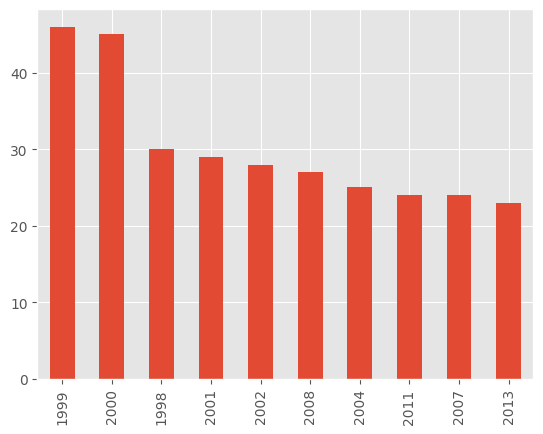

In [39]:
# so to see the year wise number of roller coster introduced
dfcopy['Year_Introduced'].value_counts()\
.head(10)\
.plot(kind='bar')

but here we dont have axis information.

Text(0, 0.5, 'Counts')

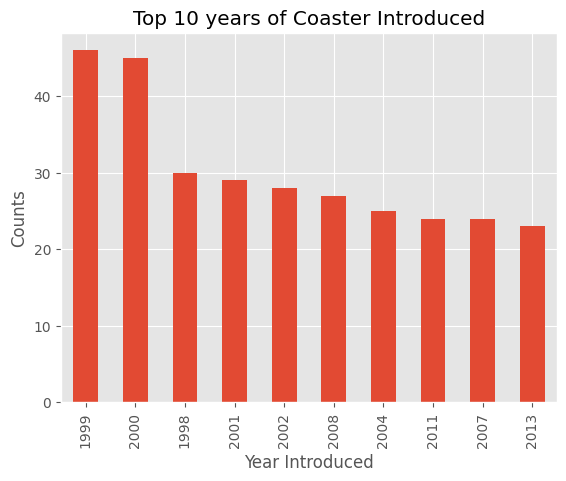

In [42]:
# so to see the year wise number of roller coster introduced
ax =dfcopy['Year_Introduced'].value_counts()\
    .head(10)\
    .plot(kind='bar', title ='Top 10 years of Coaster Introduced')
ax.set_xlabel('Year Introduced')
ax.set_ylabel('Counts')

In [43]:
dfcopy

,Coaster_name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,Ice Breaker (roller coaster),SeaWorld Orlando,Under construction,Premier Rides,2022,28.4088,-81.4633,Steel,2022-02-01,52.0,NaN,0,NaN
986,Leviathan (Sea World),Sea World,Under construction,Martin & Vleminckx,2022,-27.9574,153.4263,Wood,2022-01-01,49.7,105.0,0,NaN
987,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
988,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaT,34.0,NaN,0,NaN


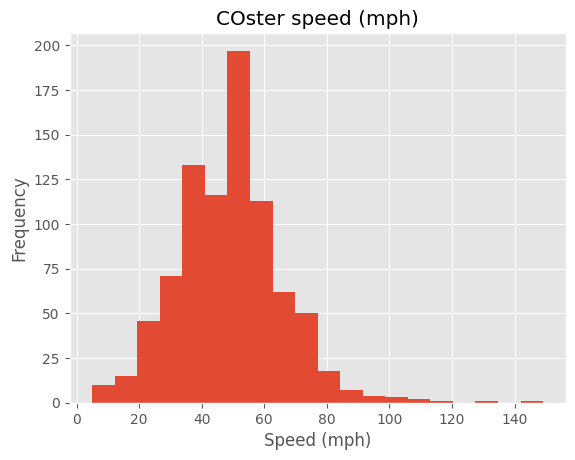

In [48]:
ax =dfcopy['Speed_mph'].plot(kind='hist', bins = 20, title = 'COster speed (mph)')
ax.set_xlabel('Speed (mph)');

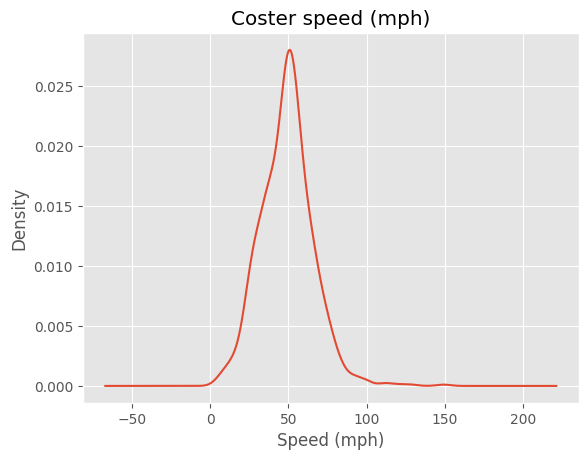

In [62]:
ax =dfcopy['Speed_mph'].plot(kind='kde', title = 'Coster speed (mph)')
ax.set_xlabel('Speed (mph)');

In [63]:
# If you face error like:
# ModuleNotFoundError: No module named 'scipy', then first instal scipy in your system and then import it using:
# %pip install scipy
# import scipy

# Step-4: Feature Relationships

- Scatterplot
- Heatmap correlation
PAirPlot
- Groupby comparison

In [64]:
dfcopy

,Coaster_name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,Ice Breaker (roller coaster),SeaWorld Orlando,Under construction,Premier Rides,2022,28.4088,-81.4633,Steel,2022-02-01,52.0,NaN,0,NaN
986,Leviathan (Sea World),Sea World,Under construction,Martin & Vleminckx,2022,-27.9574,153.4263,Wood,2022-01-01,49.7,105.0,0,NaN
987,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
988,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaT,34.0,NaN,0,NaN


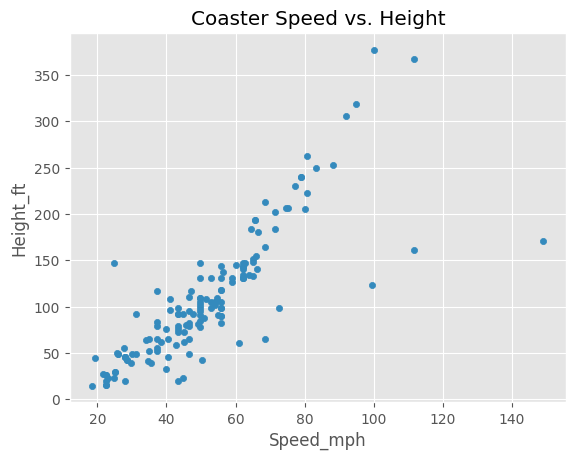

In [67]:
dfcopy.plot(kind='scatter', 
            x = 'Speed_mph',
            y = 'Height_ft',
            title = 'Coaster Speed vs. Height'
            )
plt.show()

In [69]:
import seaborn as sns

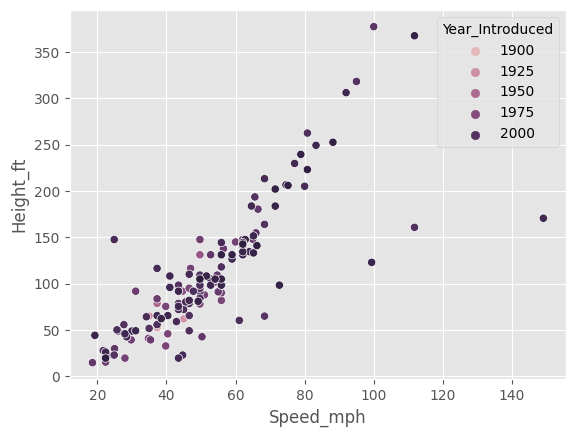

In [73]:
sns.scatterplot(x = 'Speed_mph',
                 y = 'Height_ft',
                 hue = 'Year_Introduced',
                 data =dfcopy)
plt.show()

In [74]:
dfcopy.head(5)

,Coaster_name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


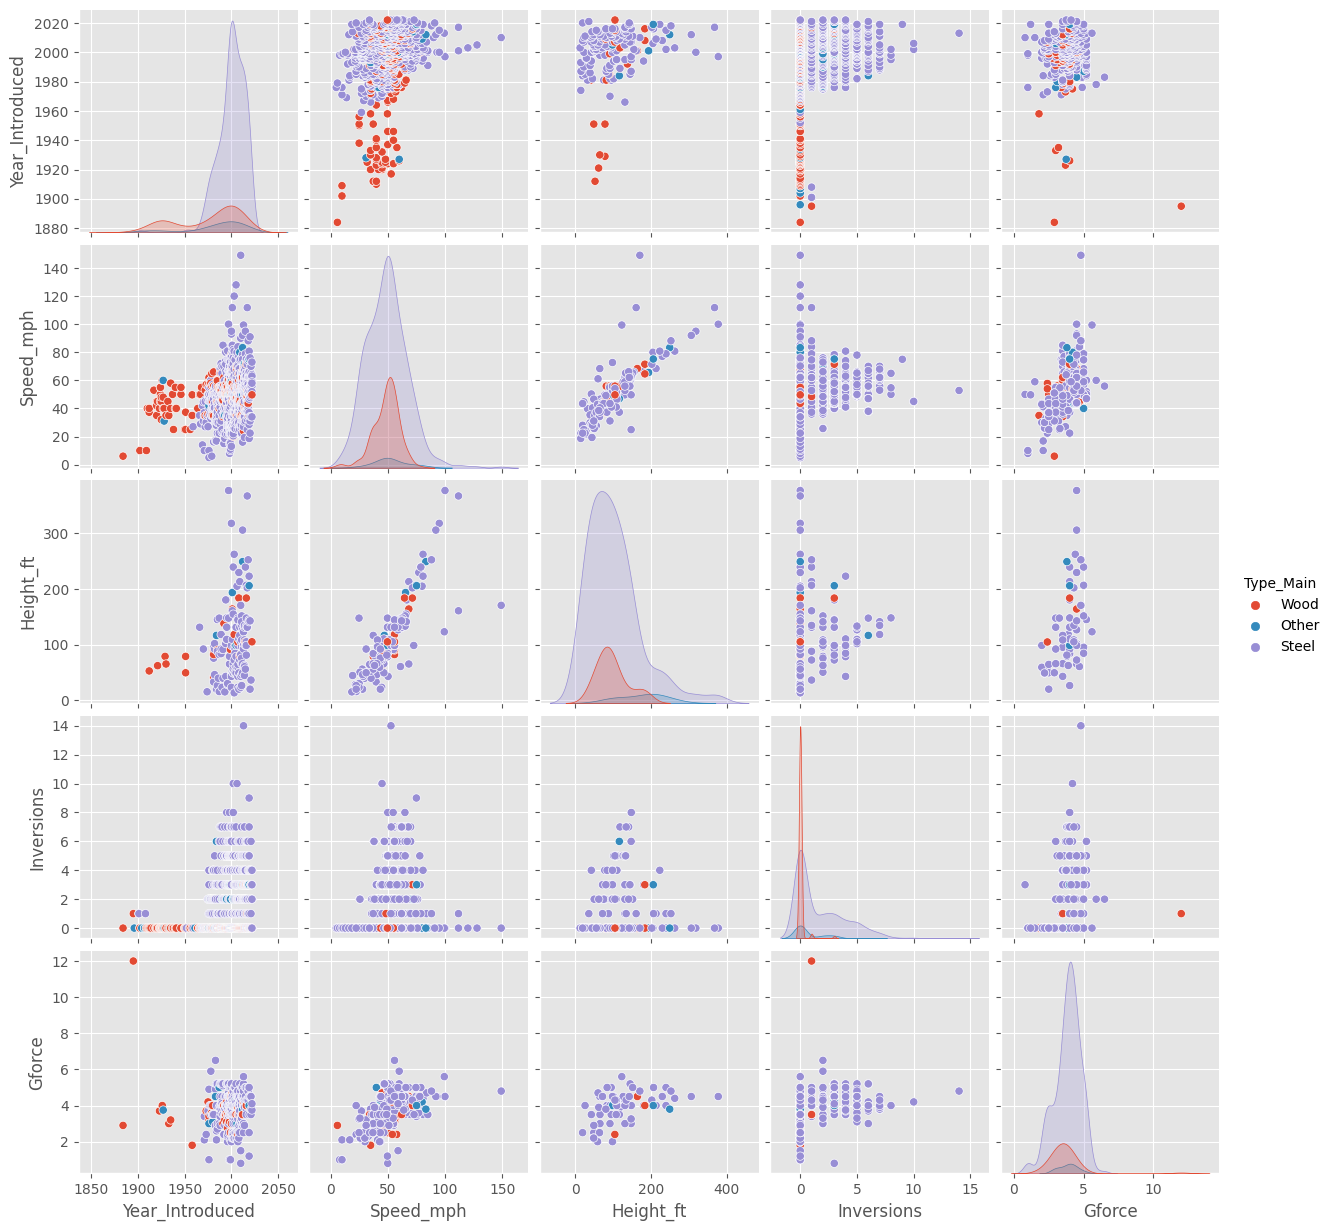

In [77]:
sns.pairplot(dfcopy, vars = ['Year_Introduced', 
                             'Speed_mph',
                             'Height_ft', 
                             'Inversions',
                             'Gforce'],
                             hue='Type_Main')
plt.show()

The correlation bewteen various variables

In [81]:
df_corr = dfcopy[['Year_Introduced', 'Speed_mph', 'Height_ft', 'Inversions', 'Gforce']].dropna().corr()

<AxesSubplot: >

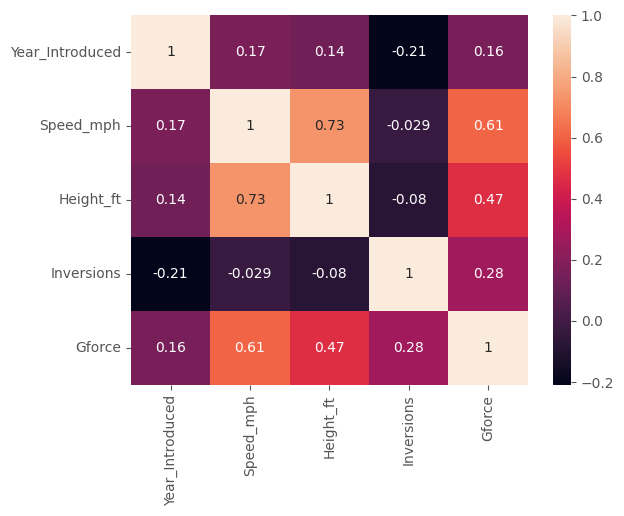

In [83]:
sns.heatmap(df_corr, annot = True)

# Step-5: Ask a Question about the data

- Try to answer a question you have about the data using a plot or statistcs

**Questions:**

1. What are the locations with the fastest roller coasters (with a minimum 10 roller coasters)?

In [84]:
dfcopy.head()

,Coaster_name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


In [86]:
dfcopy['Location'].value_counts()

Other                            181
Kings Island                      19
Cedar Point                       18
Six Flags Magic Mountain          17
Hersheypark                       16
                                ... 
Granada Studios Tour               1
Funtown Splashtown USA             1
Tolchester Beach Park              1
Suzuka, Mie Prefecture, Japan      1
Epcot                              1
Name: Location, Length: 280, dtype: int64

So we can see that there are 181 locations with no information, i.e. 'Other'. SO we want to drop it. 

In [87]:
dfcopy.query('Location != "Others"')\
.groupby('Location')['Speed_mph']\
.agg(['mean', 'count'])\
.query('count>=10')\
.sort_values('mean')

,mean,count
Location,,
Alton Towers,42.791667,12
Carowinds,43.571429,14
Other,44.575817,153
Kings Island,49.273684,19
Hersheypark,50.576923,13
Kings Dominion,52.083333,12
Six Flags Great Adventure,53.036364,11
Canada's Wonderland,53.533333,12
Six Flags Magic Mountain,57.241176,17


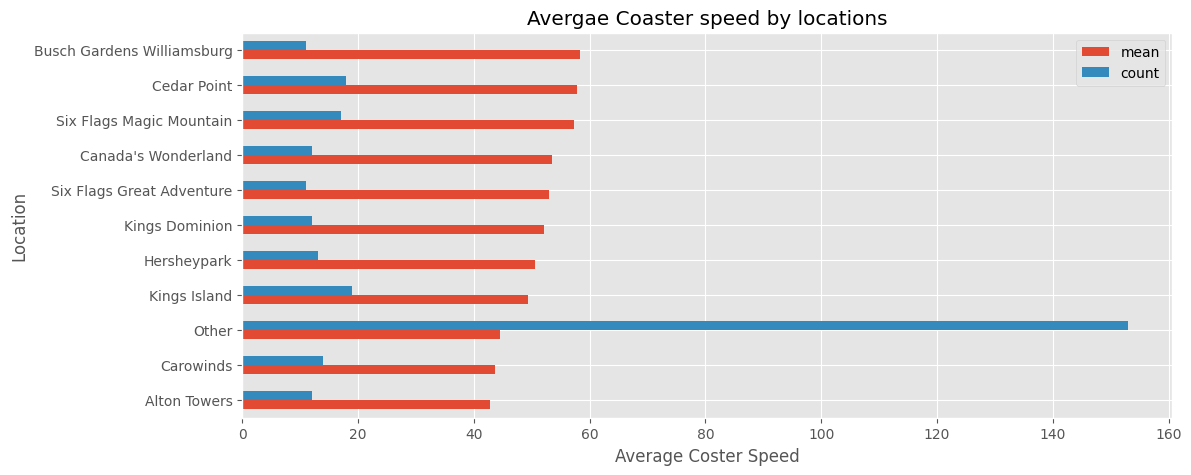

In [88]:
ax = dfcopy.query('Location != "Others"')\
    .groupby('Location')['Speed_mph']\
    .agg(['mean', 'count'])\
    .query('count>=10')\
    .sort_values('mean')\
    .plot(kind='barh', figsize=(12, 5), title='Avergae Coaster speed by locations')
ax.set_xlabel('Average Coster Speed')
plt.show()

2. Question-2 Write other questions and find the relevant plot type.